In [7]:
from keras.models import Sequential
from keras.layers import Convolution2D  # convolution Layer
from keras.layers import MaxPooling2D   # Pooling Layer
from keras.layers import Flatten        # Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Hidden Layer & Output Layer
import keras
from keras import layers


import warnings
warnings.filterwarnings("ignore")

# Fitting the CNN to the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator


#train_datagen = ImageDataGenerator(rescale = 1./255)  # max normilization
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32
train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)
#test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Shoe Classification/Shoe Classification/train',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    subset='training',
    class_mode='categorical'
)
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Shoe Classification/Shoe Classification/train',
                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
    #  batch_size = 15,
    class_mode = 'categorical',
    subset='validation')


Found 585 images belonging to 3 classes.
Found 193 images belonging to 3 classes.


In [8]:
training_set.class_indices

{'Boots': 0, 'Sandals': 1, 'Slippers': 2}

In [9]:
labels = {value: key for key, value in training_set.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")


Label Mappings for classes present in the training and validation datasets

0 : Boots
1 : Sandals
2 : Slippers


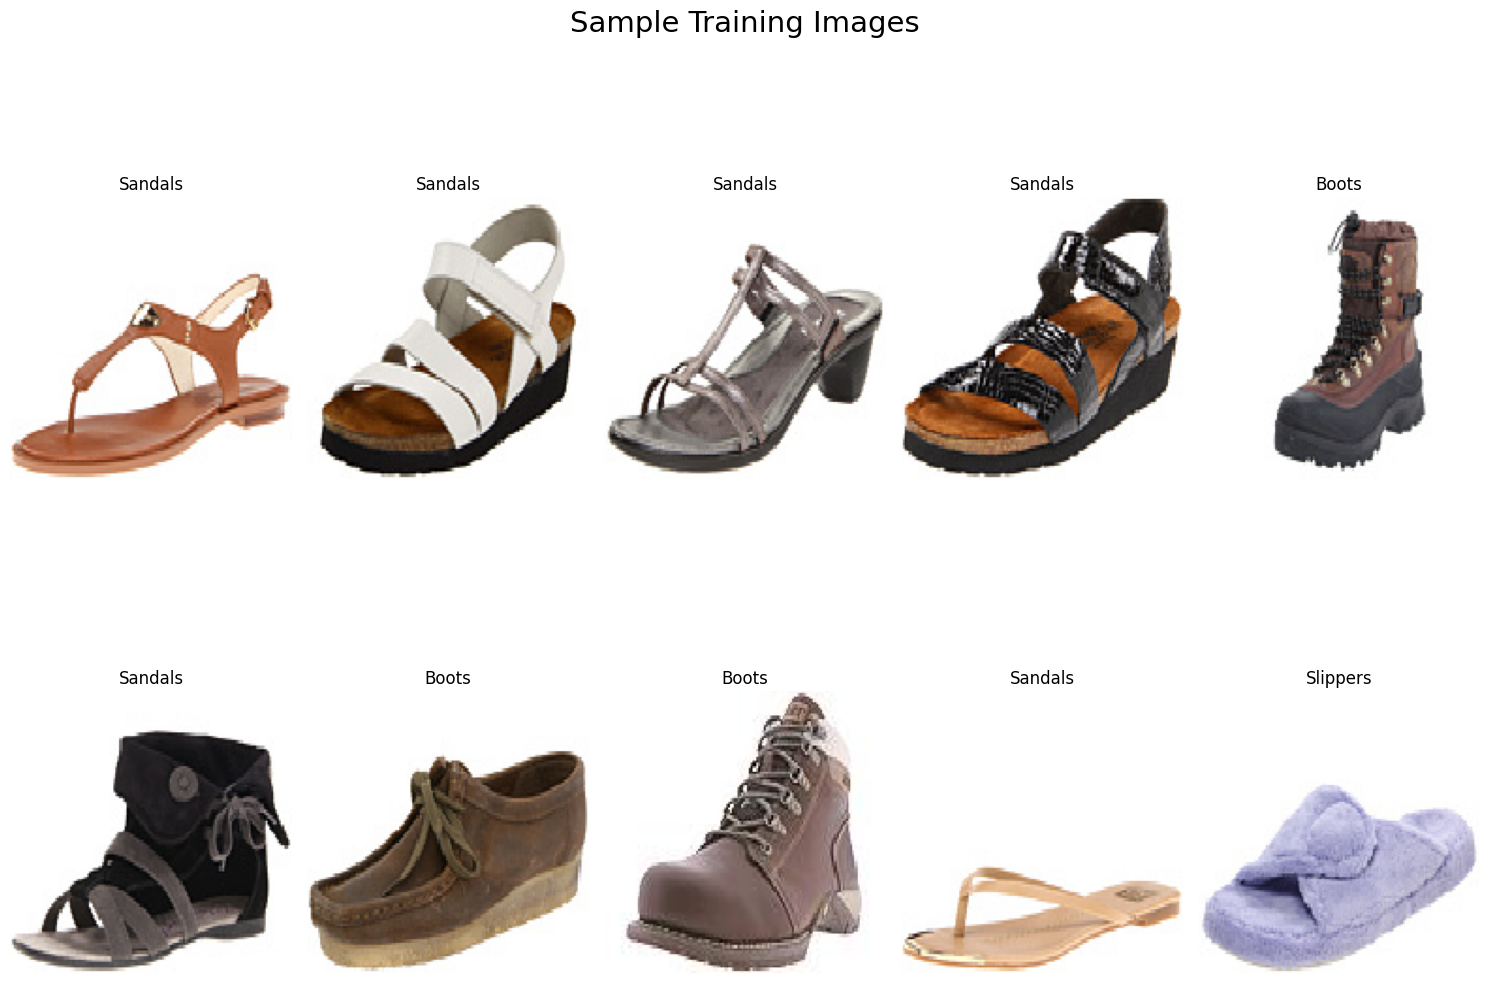

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(training_set[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(training_set[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [11]:
for image_batch, labels_batch in training_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32, 3)


In [12]:
# Initialising the CNN
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)

model=tf.keras.models.Sequential()
model.add(layers.Conv2D(16,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [17]:
# Compiling the CNN
epochs = 12 # awalnya 20

tf.random.set_seed(1)
model.build(input_shape=(None, 150, 150, 3))
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 524,195 (2.00 MB)

 Trainable params: 524,195 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
result = model.fit(training_set,
                   validation_data=test_set,
                   epochs=10)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 209s 8s/step - accuracy: 0.3732 - loss: 1.0475 - val_accuracy: 0.7772 - val_loss: 0.8894
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6571 - loss: 0.7058 - val_accuracy: 0.8756 - val_loss: 0.4294
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 37s 919ms/step - accuracy: 0.7973 - loss: 0.5000 - val_accuracy: 0.8808 - val_loss: 0.4322
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8235 - loss: 0.3918 - val_accuracy: 0.8912 - val_loss: 0.3318
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 971ms/step - accuracy: 0.8750 - loss: 0.3254 - val_accuracy: 0.9223 - val_loss: 0.2632
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8864 - loss: 0.2656 - val_accuracy: 0.8912 - val_loss: 0.2998
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 928ms/step - accuracy: 0.8956 - loss: 0.2599 - val_accuracy: 0.8964 - val_loss: 0.2657
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 941ms/step - accuracy: 0.9058 - loss: 0.2288 - val_accuracy: 0.911

In [19]:
model.save('shoe_classifier.h5')

In [23]:

from keras.models import load_model
from keras_preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt
%matplotlib inline
new_model = load_model("shoe_classifier.h5")

In [24]:
from PIL import Image
def model_output(dir_addr):
    my_img = image.load_img(dir_addr, target_size=(150,150))
    plt.imshow(my_img)
    plt.show()

    my_img = image.img_to_array(my_img)
    my_img = np.expand_dims(my_img, axis= 0)

    reverse_mapping = dict(zip([0, 1, 2], ['Boot', 'Sandal', 'Slippers']))

    def mapper(val):
        return reverse_mapping[val]

    pred = new_model.predict(my_img)
    value = np.argmax(pred)
    shoe_name = mapper(value)
    print("Prediction is {}.".format(shoe_name))

    print(str(pred)+'\n')

In [25]:
import os
os.chdir(r'/content/drive/MyDrive/Shoe Classification/Shoe Classification/test')

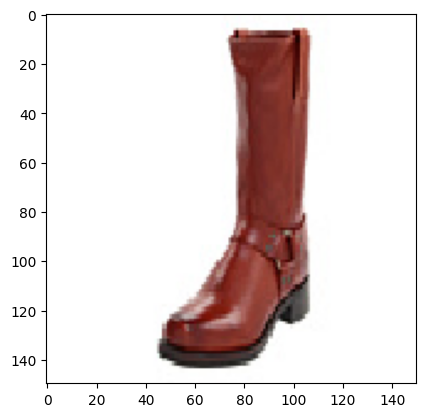

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Prediction is Boot.
[[1. 0. 0.]]



In [27]:
model_output(r"/content/drive/MyDrive/Shoe Classification/Shoe Classification/test/image (2).jpg")

In [28]:
score = model.evaluate(training_set,verbose=0)
print("Accuracy and loss of model-----------------------------------------------")
print('Train Loss : {:.4f}'.format(score[0]))
print('Train Accuracy : {:.4f}'.format(score[1]))

Accuracy and loss of model-----------------------------------------------
Train Loss : 0.2043
Train Accuracy : 0.9299


In [33]:
import gradio as gr
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your trained model (replace 'shoe_classifier.h5' with your actual model path)
model = tf.keras.models.load_model('/content/shoe_classifier.h5')

# Define image size (should match the size used during training)
IMG_WIDTH = 150
IMG_HEIGHT = 150

# Define a class dictionary (update with your class names)
class_names = ['Boots', 'Sandals', 'Slippers']  # Replace with actual class names

# Function to make predictions
def predict_image(img):
    img = img.resize((IMG_WIDTH, IMG_HEIGHT))  # Resize to model's input size
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    return class_names[class_index]  # Return only the class name

# Create Gradio Interface
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Textbox(label="Predicted Class"),
    title="Image Classification",
    description="Upload an image to classify. The output will display the class it belongs to."
)

# Launch the interface
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://75524034d29e045c0b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
